<a href="https://colab.research.google.com/github/DenisGubanov/Parser_repetit.ru/blob/main/Parser_repetit_ru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import time
import requests
from bs4 import BeautifulSoup
import datetime
import numpy as np
import pandas as pd

URL_LIST = ['https://repetit.ru/repetitors/informatika-i-programmirovanie/',
            'https://repetit.ru/repetitors/informatika-i-programmirovanie/?page=2']

pages = 60

list_teachers = []
col = ['Имя Отчество','ЗП','Статус','Стаж','Видео','Предмет','У реп.','У уч.','Дистанц.','Отзывов','Курсы']

def parsing(url):
  response = requests.get(url).text
  soup = BeautifulSoup(response, 'html.parser')
  tape = soup.find('div', class_='teachers')
  teachers = tape.find_all('div', class_='teacher-card')
  for teacher in teachers:
    t = []
    t.append(teacher.find('a', class_='teacher-name').text[1:])
    t.append(int(teacher.find('h3', class_='price').text[3:-10].replace(' ','')))
    t.append(teacher.find('p', class_='status-stage').text[10:].split('\r')[0])
    t.append(int(teacher.find('p', class_='status-stage').text[10:].split('\r')[1][14:].split(' ')[0]))
    a = True if len(teacher.find('p', class_='status-stage').text[10:].split('\r')[1][14:].split('\n\n')) > 1 else False
    t.append(a)
    t.append(teacher.find('p', class_='subject-and-review-header').text)
    t.append(teacher.find('p', class_='places-string').text)
    a = bool(t[6].find('репетитора')+1)
    b = bool(t[6].find('ученика')+1)
    с = bool(t[6].find('дистанционно')+1)
    t[6] = a
    t.append(b)
    t.append(с)
    if (teacher.find('a', class_='show-all-reviews') != None) and (teacher.find('div', class_='subjects-and-divisions') != None):
      t.append(int(teacher.find('a', class_='show-all-reviews').text[12:-1]))
      t.append(list(teacher.find('div', class_='subjects-and-divisions').text.split('\n')[2:-1]))
    else:
      continue    
    l = []
    for i in t[10]:
      if (i[0] != '+'):
        if (i[0] == ' '):
          l.append('Школьный курс')
        elif (i == 'подготовка к олимпиадам'):
          l.append('Подготовка к олимпиадам')
        else:
          l.append(i)
    t[10] = l
    list_teachers.append(t)

parsing(URL_LIST[0])
parsing(URL_LIST[1])
for i in range(3, pages):
  newurl = URL_LIST[1][:-1] + str(i)
  parsing(newurl)
df = pd.DataFrame(list_teachers,columns=col)
df

,Имя Отчество,ЗП,Статус,Стаж,Видео,Предмет,У реп.,У уч.,Дистанц.,Отзывов,Курсы
0,Даниил Сергеевич,2500,Частный преподаватель,4,True,Репетитор по информатике,True,False,True,35,"[ОГЭ (ГИА), Школьный курс]"
1,Екатерина Юрьевна,1800,Частный преподаватель,9,False,Репетитор по информатике,False,True,True,23,"[ОГЭ (ГИА), Школьный курс, Pascal]"
2,Дмитрий Дмитриевич,2500,Частный преподаватель,9,True,Репетитор по информатике,False,True,True,106,"[ЕГЭ, Pascal, Python]"
3,Дмитрий Александрович,2500,Частный преподаватель,13,True,Репетитор по информатике,True,True,True,81,"[ОГЭ (ГИА), ЕГЭ, Подготовка к олимпиадам, Школ..."
4,Алексей Петрович,1200,Частный преподаватель,11,True,Репетитор по информатике,True,True,True,43,"[ОГЭ (ГИА), ЕГЭ, Подготовка к олимпиадам, Школ..."
...,...,...,...,...,...,...,...,...,...,...,...
494,Максим Валерьевич,1000,Школьный преподаватель,8,False,Репетитор по информатике,True,True,True,1,"[ОГЭ (ГИА), ЕГЭ, Школьный курс]"
495,Татьяна Сергеевна,700,Частный преподаватель,8,False,Репетитор по информатике,True,True,True,3,"[ОГЭ (ГИА), ЕГЭ, Школьный курс, Python, Програ..."
496,Дамир Абылайханович,1300,Частный преподаватель,7,False,Репетитор по информатике,True,True,True,1,"[ОГЭ (ГИА), ЕГЭ, Pascal, TurboPascal]"
497,Ольга Борисовна,1800,Частный преподаватель,27,False,Репетитор по информатике,False,True,False,15,"[ОГЭ (ГИА), ЕГЭ, Школьный курс]"


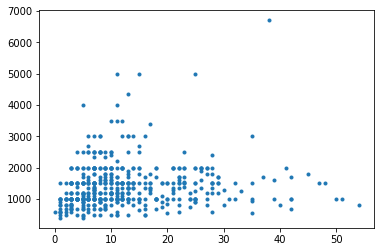

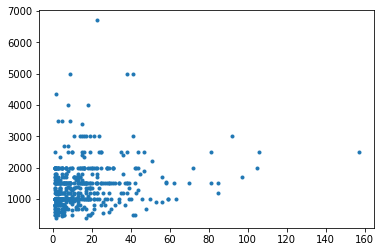

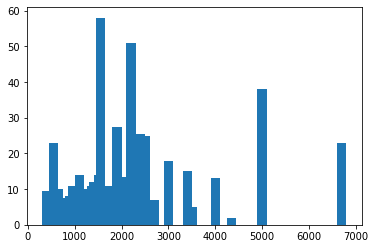

<BarContainer object of 40 artists>

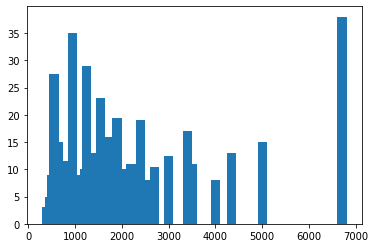

In [159]:
import matplotlib.pyplot as plt

plt.scatter(df['Стаж'],df['ЗП'],marker='.')
plt.show()
plt.scatter(df['Отзывов'],df['ЗП'],marker='.')
plt.show()
plt.bar(df.groupby(['ЗП']).median().index, df.groupby(['ЗП']).median()['Отзывов'], 200)
plt.show()
plt.bar(df.groupby(['ЗП']).median().index, df.groupby(['ЗП']).median()['Стаж'], 200)

In [160]:
for i in range(0,5):
  print('Диапозон: от ',i*1000, 'руб. до ',(i+1)*1000,'руб.')
  print(df[df['ЗП'] < (i+1)*1000][df['ЗП'] >= i*1000].mean())
  print('Кол-во примеров: ',df[df['ЗП'] < (i+1)*1000][df['ЗП'] >= i*1000].count()[0])
  print()

Диапозон: от  0 руб. до  1000 руб.
ЗП          714.444444
Стаж         10.844444
Видео         0.022222
У реп.        0.600000
У уч.         0.811111
Дистанц.      0.811111
Отзывов      11.377778
dtype: float64
Кол-во примеров:  90

Диапозон: от  1000 руб. до  2000 руб.
ЗП          1291.396104
Стаж          12.951299
Видео          0.048701
У реп.         0.623377
У уч.          0.730519
Дистанц.       0.769481
Отзывов       14.146104
dtype: float64
Кол-во примеров:  308

Диапозон: от  2000 руб. до  3000 руб.
ЗП          2145.0000
Стаж          12.4750
Видео          0.1000
У реп.         0.6875
У уч.          0.6625
Дистанц.       0.8875
Отзывов       21.4875
dtype: float64
Кол-во примеров:  80

Диапозон: от  3000 руб. до  4000 руб.
ЗП          3135.714286
Стаж          13.000000
Видео          0.142857
У реп.         0.500000
У уч.          0.642857
Дистанц.       0.714286
Отзывов       21.571429
dtype: float64
Кол-во примеров:  14

Диапозон: от  4000 руб. до  5000 руб.
ЗП          4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can 